In [18]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [19]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [20]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [21]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [22]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Text(0.5, 1.0, 'Box plot of Median value of owner-occupied homes')

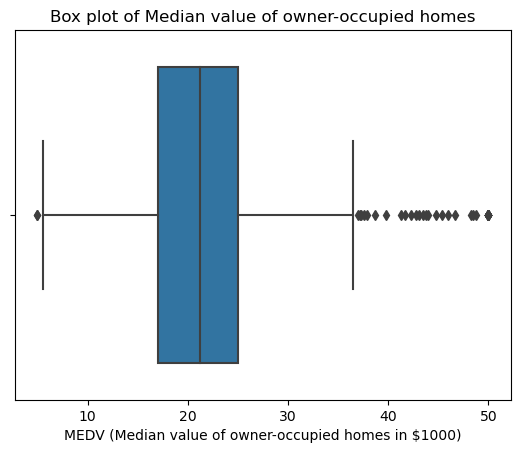

In [23]:
# Median value of owner-occupied homes
sns.boxplot(data=boston_df, x='MEDV')
plt.xlabel('MEDV (Median value of owner-occupied homes in $1000)')
plt.title('Box plot of Median value of owner-occupied homes')

The boxplot of Median value of owner-occupied homes is evenly distributed and range from USD 4000 to 38,000

The IQR is around $10,000 ranging from USD 15,000 to 25,000

There are many outliers on the higher side ranging from USD 38,000 to 51,000

Text(0.5, 1.0, 'Count of Tract bounds river')

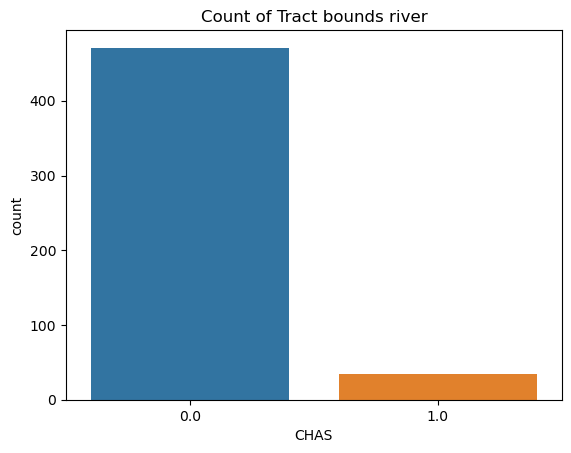

In [24]:
# Charles river variable (CHAS)
ax = sns.countplot(boston_df, x='CHAS')
ax.set_title('Count of Tract bounds river')

Only few of the Charles River Dummy Variable is 1 All other remaining (>450) Charles River Dummy Variable has a value of 0

In [25]:
boston_df['age_group'] = boston_df['AGE'].apply(lambda x: '35 years and younger' if x<35 else '70 years and older' if x>=70 else 'between 35 and 70 years')

Text(0.5, 1.0, 'MEDV across age groups')

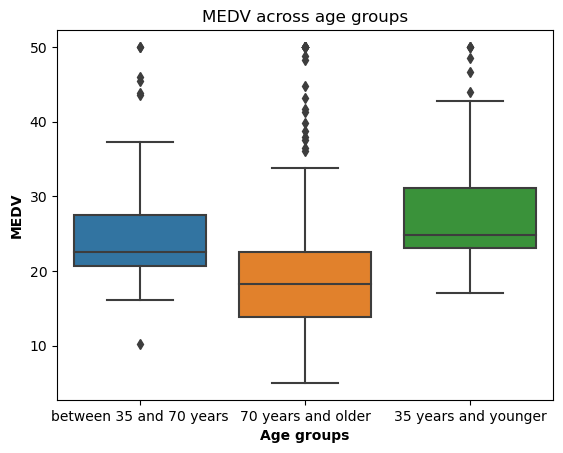

In [26]:
# boxplot for the MEDV variable vs the AGE variable
sns.boxplot(boston_df, x='age_group', y='MEDV')
plt.xlabel('Age groups', fontweight='bold')
plt.ylabel('MEDV', fontweight='bold')
plt.title('MEDV across age groups')

Lesser the age group, higher is the value of median value of owner-occupied homes.


Text(0, 0.5, 'Proportion of non-retail business acres per town')

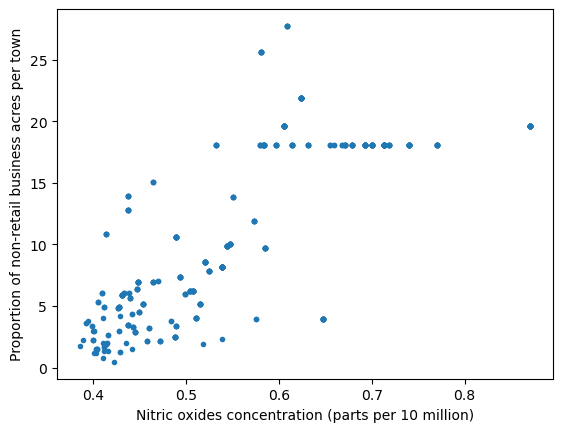

In [27]:
#  scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
plt.plot(boston_df['NOX'], boston_df['INDUS'], '.')
plt.xlabel('Nitric oxides concentration (parts per 10 million)')
plt.ylabel('Proportion of non-retail business acres per town')

# There is a positive relationship between the two.

Scatterplot of Nitric oxide concentrations and the proportion of non-retail business acres per town, definitely show a relationship exists and the relationship is positive. 

Text(0, 0.5, 'Frequency')

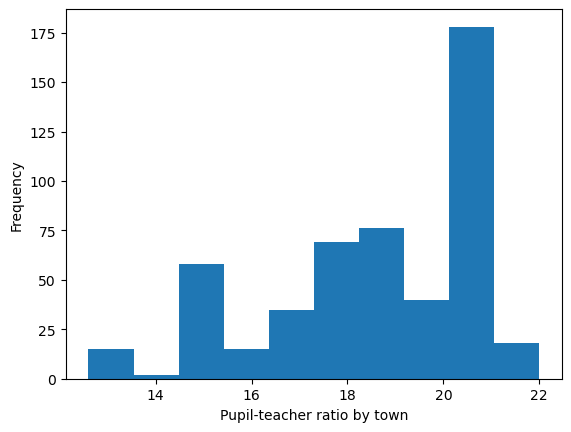

In [28]:
# histogram for the pupil to teacher ratio variable
plt.hist(boston_df['PTRATIO'], bins=10)
plt.xlabel('Pupil-teacher ratio by town')
plt.ylabel('Frequency')


Density of pupil:teacher ratio being 21 is higher

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

### Ho = There is no difference in median value of houses bounded by Charles river
### Ha = There is difference in median value of houses bounded by Charles river

In [29]:
# Levene's Test
levene_result = scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'], boston_df[boston_df['CHAS']==1]['MEDV'])
print(f"Levene result = {levene_result}")
# T-test
ttest_result = scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'], boston_df[boston_df['CHAS']==1]['MEDV'], equal_var=False)
print(f"T-Test result = {ttest_result}")

Levene result = LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)
T-Test result = Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)


Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in Median value of homes near the Charles river and others.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#### Ho = There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
#### Ha = There is difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

#### ANOVA

In [30]:
anova_result = scipy.stats.f_oneway(boston_df[boston_df['age_group']=='35 years and younger']['MEDV'],
                               boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV'],
                               boston_df[boston_df['age_group']=='70 years and older']['MEDV'])

print(f"ANOVA result = {anova_result}")


ANOVA result = F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)


Since the p-value is less than 0.05, we reject null hypothesis as there is significant evidence that at least one of the means differ.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#### Ho = There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#### Ha = There is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [31]:
pearson_result = scipy.stats.pearsonr(boston_df['NOX'],  boston_df['INDUS'])
print(f"Pearson correlation coefficient = {pearson_result}")

Pearson correlation coefficient = PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)


Since the p-value is less than 0.05, we reject the Null Hypothesis and conclude that there is a relationship between Nitric Oxide Concentration and proportion of non-retail business acres per town.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#### Ho = Additional weighted distance to the five Boston employment centres has no effect on the Median value of owner occupied homes
#### Ha = Additional weighted distance to the five Boston employment centres has an effect on the Median value of owner occupied homes

In [32]:
model = ols('MEDV ~ DIS', data=boston_df).fit()
print(model.summary())
print("\n\nSince p-value is less than 0.05, the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes is statistically significant")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        15:12:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

p-value is less than 0.05 so we reject the null hypothesis.

So there is a relationship and Additional weighted distance to the five Boston employment centres has an effect on the Median value of owner occupied homes

As R-squared is 0.062, the relationship is positive but very weak.